In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
cd /gdrive/MyDrive/

/gdrive/MyDrive


In [3]:
import scipy.io as io

import numpy as np
import keras
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import LabelBinarizer

trX = io.loadmat('train_32x32.mat')['X']
trY = io.loadmat('train_32x32.mat')['y']
tsX = io.loadmat('test_32x32.mat')['X']
tsY = io.loadmat('test_32x32.mat')['y']

# print(trX.shape)
# print(tsX.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


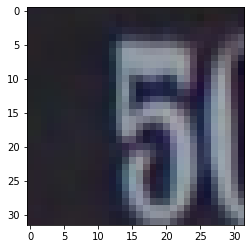

In [4]:
# plt.imshow(trX[3334])
# plt.show()

In [5]:
# Convert training and testing images into 'float64' type

training_images = trX.astype('float64')
testing_images = tsX.astype('float64')

# Convert training and testing labels into 'int64' type

training_labels = trY.astype('int64')
testing_labels = tsY.astype('int64')

In [6]:
# print('Min: {}, Max: {}'.format(training_images.min(), training_images.max()))

# Normalizing the dataset in the range of 0-1

training_images /= 255.0
testing_images /= 255.0

# Transforming the training and testing labels

lb = LabelBinarizer()
training_labels = lb.fit_transform(training_labels)
testing_labels = lb.fit_transform(testing_labels)

Min: 0.0, Max: 255.0


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# Using sequential model for 2D convolution neural networks.

model = Sequential()
model.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3))) # 64 Feature Maps, 5x5 kernel, 1 stride 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # MaxPooling size 2, 2 stride

model.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same', activation='relu')) # 64 Feature Maps, 5x5 kernel, 1 stride
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # MaxPooling size 2, 2 stride

model.add(Conv2D(128, (5, 5), strides=(1, 1), padding='same', activation='relu')) # 128 Feature Maps, 5x5 kernel, 1 stride

# model.summary()

model.add(Flatten())
model.add(Dense(3072, activation='relu')) # Fully Connected network with ReLU
model.add(Dense(2048, activation='relu')) # Fully Connected network with ReLU
model.add(Dense(10, activation='softmax')) # Fully Connected network with Softmax for the Output layer

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 3072)              2

In [8]:
# Using Stochastic Gradient Descent optimizer with a learning rate = 0.01

network_opt = keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=network_opt, loss='categorical_crossentropy', metrics=['accuracy'])

# history = model.fit_generator(datagen.flow(train_images, train_labels, batch_size=128), epochs=10, validation_data=(test_images, test_labels))

predictor = model.fit(training_images, training_labels, epochs=20, validation_data= (testing_images, testing_labels))

Epoch 1/20
2290/2290 [==============================] - 55s 10ms/step - loss: 2.1901 - accuracy: 0.2127 - val_loss: 1.0982 - val_accuracy: 0.6350
Epoch 2/20
2290/2290 [==============================] - 21s 9ms/step - loss: 0.7418 - accuracy: 0.7793 - val_loss: 0.5187 - val_accuracy: 0.8518
Epoch 3/20
2290/2290 [==============================] - 22s 9ms/step - loss: 0.4600 - accuracy: 0.8673 - val_loss: 0.4529 - val_accuracy: 0.8713
Epoch 4/20
2290/2290 [==============================] - 22s 9ms/step - loss: 0.3583 - accuracy: 0.8942 - val_loss: 0.4187 - val_accuracy: 0.8773
Epoch 5/20
2290/2290 [==============================] - 22s 10ms/step - loss: 0.2939 - accuracy: 0.9141 - val_loss: 0.3863 - val_accuracy: 0.8895
Epoch 6/20
2290/2290 [==============================] - 22s 9ms/step - loss: 0.2484 - accuracy: 0.9270 - val_loss: 0.3594 - val_accuracy: 0.8992
Epoch 7/20
2290/2290 [==============================] - 22s 9ms/step - loss: 0.2036 - accuracy: 0.9413 - val_loss: 0.3934 - val_

In [9]:
# Finding training and testing accuracies and losses

train_set_acc = predictor.history['accuracy']
test_set_acc = predictor.history['val_accuracy']

train_set_loss = predictor.history['loss']
test_set_loss = predictor.history['val_loss']


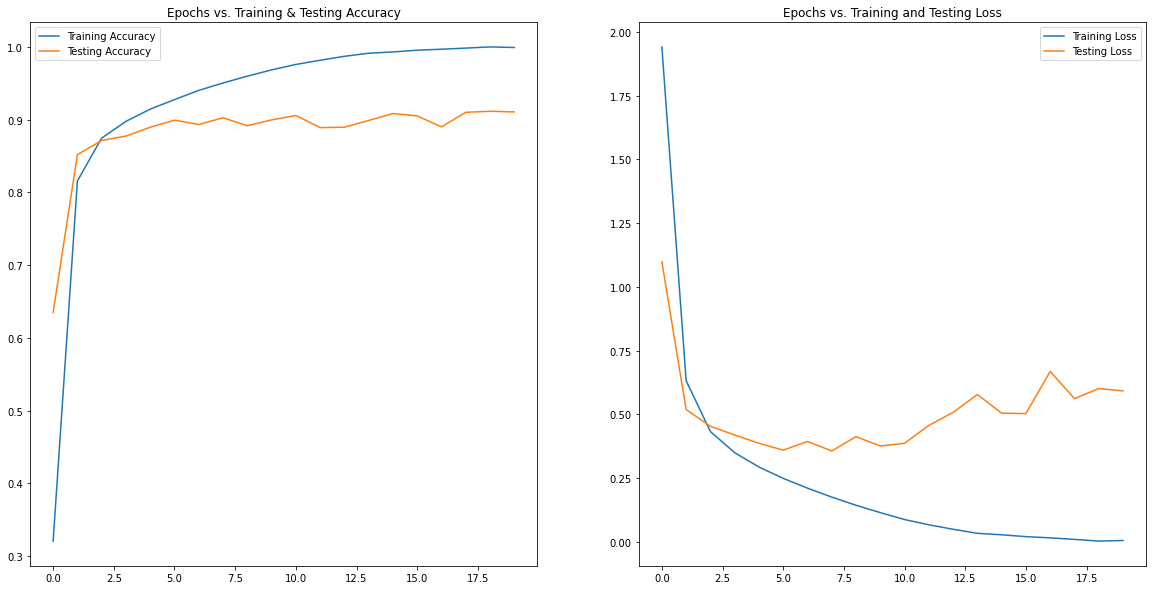

In [10]:
# PLotting epochs against training and testing data

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_set_acc, label='Training Accuracy')
plt.plot(test_set_acc, label='Testing Accuracy')
plt.legend()
plt.title('Epochs vs. Training & Testing Accuracy')

# PLotting epochs against training and testing loss

plt.subplot(1, 2, 2)
plt.plot(train_set_loss, label='Training Loss')
plt.plot(test_set_loss, label='Testing Loss')
plt.legend()
plt.title('Epochs vs. Training and Testing Loss')

plt.show()